# Main Library

In [1]:
# Reading Data
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Make Preprocessing Data
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Building Model
import tensorflow as tf
import tensorflow.keras as k

# Loding Model
import pickle

## Reading Data & Label

# Make Augmentation

In [2]:
data_aug = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal", (128, 128, 3)), 
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

In [3]:
path_train = r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\cifar-10\train"
path_test = r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\cifar-10\test"
label_df = pd.read_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\cifar-10\trainLabels.csv").values

train_data = []
test_data = []

label = []
class_name = ["airplane", "automobile", "bird","cat", "deer", "dog","frog","horse", "ship","truck"]

# Loading Training Data
for file in os.listdir(path_train):
    images = os.listdir(path_train + "\\" + file)
    for image in images:
        img = cv2.imread(path_train + "\\" + file + "\\" + image)
        img = cv2.resize(img, (48, 48))
        train_data.append(img)
        y = class_name.index(label_df[int(image.split(".")[0]) - 1][1])
        label.append(y)
        for _ in range(2):
            new_img = data_aug(tf.expand_dims(img, 0))[0]
            train_data.append(new_img)
            label.append(y)

print("--------- Done --------")
        
# Loading Testing Data
for file in os.listdir(path_test):
    images = os.listdir(path_test + "\\" + file)
    for image in images:
        img = cv2.imread(path_test + "\\" + file + "\\" + image)
        img = cv2.resize(img, (48, 48))
        test_data.append(img)

print("--------- Done --------")


print("Training Length images is ==> ",len(test_data))
print("Testing Length images is ==> ",len(train_data))

--------- Done --------
--------- Done --------
Training Length images is ==>  300000
Testing Length images is ==>  150000


## Make Preprocessing Data

In [4]:
# Training
train_data = np.array(train_data)
train_data = train_data.astype("float32")
train_data = train_data / 255.0

# Testing
test_data = np.array(test_data)
test_data = test_data.astype("float32")
test_data = test_data / 255.0

In [5]:
label = np.array(label)
label_img = to_categorical(label, 10)
label_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
label_img[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Shuffle & Split ==> Data

In [7]:
x_img, y_label = shuffle(train_data, label_img, random_state=50)
x_train, x_test, y_train, y_test = train_test_split(x_img, y_label, train_size=0.7, random_state=42)

In [8]:
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((105000, 48, 48, 3), (105000, 10), (45000, 48, 48, 3), (45000, 10))

# Show Some Data

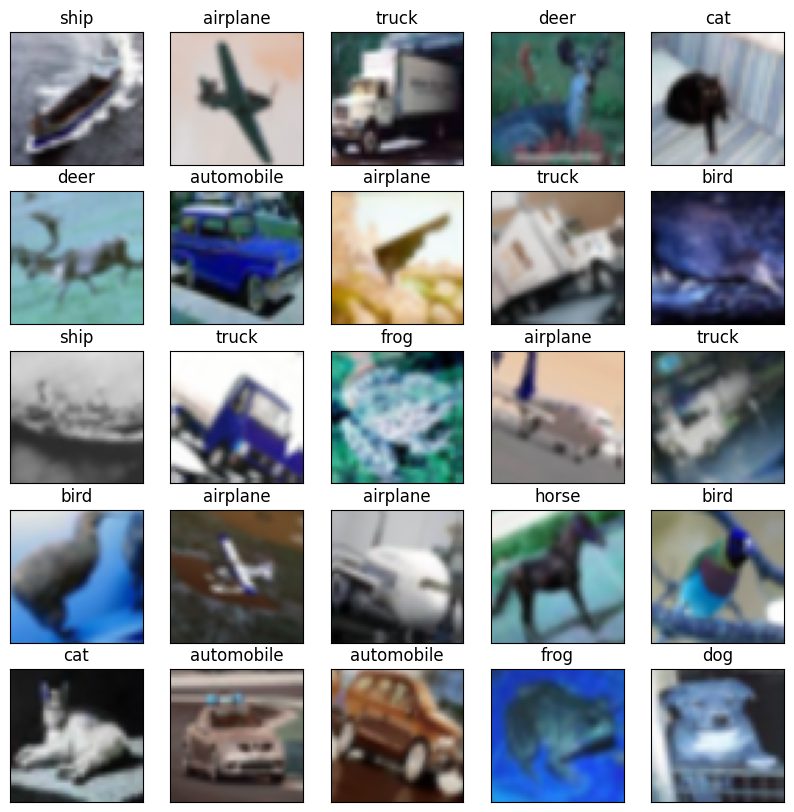

In [9]:
plt.figure(figsize=(10, 10))
for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(class_name[np.argmax(y_train[i])])

In [11]:
x_train.shape, y_train.shape

((105000, 48, 48, 3), (105000, 10))

## ----------------------------------------------------------------------------------------------------------------------------
## ----------------------------------------------------------------------------------------------------------------------------
## ----------------------------------------------------------------------------------------------------------------------------

## Building Model from Scratch

In [13]:
model = k.models.Sequential()

model.add(k.layers.Conv2D(16, (5, 5), activation="relu", input_shape=(48, 48, 3), padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(32, (4, 4), activation="relu",  padding="same"))
model.add(k.layers.MaxPool2D((2, 2)))

model.add(k.layers.Conv2D(64, (3, 3), activation="relu", padding="valid"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(128, (2, 2), activation="relu", padding="same"))
model.add(k.layers.MaxPool2D((2, 2)))

model.add(k.layers.Conv2D(256, (2, 2), activation="relu", padding="same"))

model.add(k.layers.Flatten())

model.add(k.layers.BatchNormalization())
model.add(k.layers.Dense(128, activation="sigmoid"))
model.add(k.layers.Activation("relu"))
model.add(k.layers.Dropout(0.5))

model.add(k.layers.Dense(32, activation="relu"))
model.add(k.layers.Dropout(0.5))

model.add(k.layers.Dense(10, activation="softmax"))

model.compile(optimizer="nadam", loss=k.losses.CategoricalCrossentropy(), metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 16)        1216      
                                                                 
 average_pooling2d_3 (Avera  (None, 24, 24, 16)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 average_pooling2d_4 (Avera  (None, 5, 5, 64)         

In [14]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), validation_split=0.2)

Epoch 1/50
3282/3282 [==============================] - 132s 39ms/step - loss: 1.8932 - accuracy: 0.2795 - val_loss: 1.5842 - val_accuracy: 0.4166
Epoch 2/50
3282/3282 [==============================] - 115s 35ms/step - loss: 1.5564 - accuracy: 0.4329 - val_loss: 1.3687 - val_accuracy: 0.5053
Epoch 3/50
3282/3282 [==============================] - 113s 35ms/step - loss: 1.3815 - accuracy: 0.5136 - val_loss: 1.2656 - val_accuracy: 0.5513
Epoch 4/50
3282/3282 [==============================] - 115s 35ms/step - loss: 1.2794 - accuracy: 0.5622 - val_loss: 1.2434 - val_accuracy: 0.5778
Epoch 5/50
3282/3282 [==============================] - 119s 36ms/step - loss: 1.2029 - accuracy: 0.5931 - val_loss: 1.1134 - val_accuracy: 0.6180
Epoch 6/50
3282/3282 [==============================] - 114s 35ms/step - loss: 1.1483 - accuracy: 0.6157 - val_loss: 1.1024 - val_accuracy: 0.6164
Epoch 7/50
3282/3282 [==============================] - 115s 35ms/step - loss: 1.0981 - accuracy: 0.6357 - val_loss: 1

In [18]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

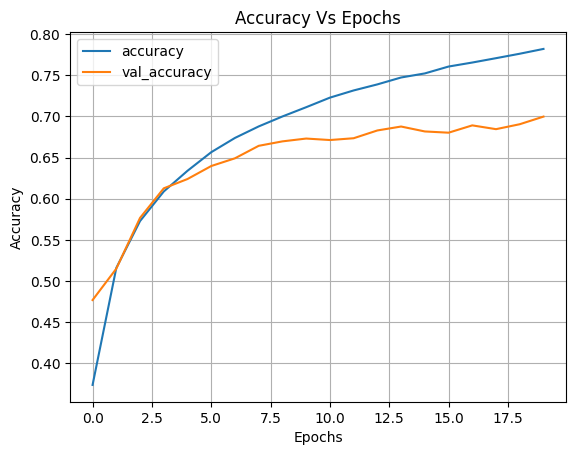

In [14]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

In [15]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"The Accuracy Testing Data is ==> {round(accuracy, 4)} %")
print(f"The loss Testing Data is ==> {round(loss, 4)}")

1407/1407 [==============================] - 11s 8ms/step - loss: 0.9450 - accuracy: 0.6997
The Accuracy Testing Data is ==> 0.6996889114379883 %
The loss Testing Data is ==> 0.945012092590332


## ----------------------------------------------------------------------------------------------------------------------------
## ----------------------------------------------------------------------------------------------------------------------------
## ----------------------------------------------------------------------------------------------------------------------------

# Dowload Model

In [17]:
pickle.dump(model, open(r"D:\Pycharm\model_pickle\Cifar-10.bin", "wb"))

In [2]:
# model = pickle.load(open(r"D:\Pycharm\model_pickle\Cifar-10.bin", "rb"))
# class_name = ["airplane", "automobile", "bird","cat", "deer", "dog","frog","horse", "ship","truck"]

# Prediction

In [20]:
prediction = model.predict(test_data)

In [22]:
predictionction

In [23]:
prediction = [class_name[np.argmax(i)] for i in prediction]
prediction

# Submition

In [24]:
submit = pd.DataFrame({"id": range(1, len(prediction)+1),
                       "label": prediction})

submit.head(5)

In [25]:
submition.to_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\cifar-10\Submition.csv", index=False)